# <font color='brown'>Pandas 百题大冲关</font>

## 实验介绍

![pandas_logo.png](attachment/pandas_logo.png)

Pandas 是基于 NumPy 的一种数据处理工具，该工具为了解决数据分析任务而创建。Pandas 纳入了大量库和一些标准的数据模型，提供了高效地操作大型数据集所需的函数和方法。  

Pandas 的数据结构：Pandas 主要有 Series（一维数组），DataFrame（二维数组），Panel（三维数组），Panel4D（四维数组），PanelND（更多维数组）等数据结构。其中 Series 和 DataFrame 应用的最为广泛。
- Series 是一维带标签的数组，它可以包含任何数据类型。包括整数，字符串，浮点数，Python 对象等。Series 可以通过标签来定位。
- DataFrame 是二维的带标签的数据结构。我们可以通过标签来定位数据。这是 NumPy 所没有的。

**Pandas 百题大冲关**分为基础篇和进阶篇，每部分各有 50 道练习题。基础部分的练习题在于熟悉 Pandas 常用方法的使用，而进阶部分则侧重于 Pandas 方法的组合应用。

如果你在学习课程之前已经有 Pandas 使用基础，那么可以对照着单元格复习一遍。

### 实验知识点
本次实验涉及的知识点主要有：
- 创建Series
- Series基本操作
- 创建DataFrame
- DataFrame基本操作
- DataFrame文件操作
- Series，DataFrame和多索引
- 透视表
- 数据清洗
- 数据预处理
- 可视化

### 实验环境

- Python 3.6
- NumPy
- Pandas

### 目录索引

- <a href="#1">1. 基础部分</a>
- <a href="#2">2. 进阶部分</a>
- <a href="#3">3. 实验总结</a>

## <a id = "1">1. 基础部分</a>

### 导入 Pandas 模块

#### 1. 导入 Pandas
练习 Pandas 之前，首先需要导入 Pandas 模块，并约定简称为 `pd`。

In [1]:
import pandas as pd

#### 2. 查看 Pandas 版本信息

In [2]:
print(pd.__version__)

0.23.0


### 创建 Series 数据类型

Pandas 中，Series 可以被看作由 1 列数据组成的数据集。

创建 Series 语法：`s = pd.Series(data, index=index)`，可以通过多种方式进行创建，以下介绍了 3 个常用方法。

#### 3. 从列表创建 Series

In [3]:
arr=[0, 1, 2, 3, 4]
s1=pd.Series(arr) # 如果不指定索引，则默认从 0 开始
s1

0    0
1    1
2    2
3    3
4    4
dtype: int64

提示：前面的 `0,1,2,3,4` 为当前 Series 的索引，后面的 `0,1,2,3,4` 为 Series 的值。

#### 4. 从 Ndarray 创建 Series

In [4]:
import numpy as np
n=np.random.randn(5) # 创建一个随机 Ndarray 数组

index=['a','b','c','d','e']
s2=pd.Series(n,index=index)
s2

a   -0.181831
b   -1.011126
c    2.355990
d    0.513898
e    2.170401
dtype: float64

#### 5. 从字典创建 Series

In [5]:
d={'a':1,'b':2,'c':3,'d':4,'e':5}
s3=pd.Series(d)
s3

a    1
b    2
c    3
d    4
e    5
dtype: int64

### Series 基本操作

#### 6. 修改 Series 索引

In [6]:
print(s1) # 以 s1 为例

s1.index=['A','B','C','D','E'] # 修改后的索引
s1

0    0
1    1
2    2
3    3
4    4
dtype: int64


A    0
B    1
C    2
D    3
E    4
dtype: int64

#### 7. Series 纵向拼接

In [7]:
s4=s3.append(s1) # 将 s1 拼接到 s3
s4

a    1
b    2
c    3
d    4
e    5
A    0
B    1
C    2
D    3
E    4
dtype: int64

#### 8. Series 按指定索引删除元素

In [8]:
print(s4)
s4=s4.drop('e') # 删除索引为 e 的值
s4

a    1
b    2
c    3
d    4
e    5
A    0
B    1
C    2
D    3
E    4
dtype: int64


a    1
b    2
c    3
d    4
A    0
B    1
C    2
D    3
E    4
dtype: int64

#### 9. Series 修改指定索引元素

In [9]:
s4['A']=6 # 修改索引为 A 的值 = 6
s4

a    1
b    2
c    3
d    4
A    6
B    1
C    2
D    3
E    4
dtype: int64

#### 10. Series 按指定索引查找元素

In [10]:
s4['B']

1

#### 11. Series 切片操作
例如对`s4`的前 3 个数据访问

In [11]:
s4[:3]

a    1
b    2
c    3
dtype: int64

### Series 运算

#### 12. Series 加法运算
Series 的加法运算是按照索引计算，如果索引不同则填充为 `NaN`（空值）。

In [12]:
s4.add(s3)

A    NaN
B    NaN
C    NaN
D    NaN
E    NaN
a    2.0
b    4.0
c    6.0
d    8.0
e    NaN
dtype: float64

#### 13. Series 减法运算
Series的减法运算是按照索引对应计算，如果不同则填充为 `NaN`（空值）。

In [13]:
s4.sub(s3)

A    NaN
B    NaN
C    NaN
D    NaN
E    NaN
a    0.0
b    0.0
c    0.0
d    0.0
e    NaN
dtype: float64

#### 14. Series 乘法运算
Series 的乘法运算是按照索引对应计算，如果索引不同则填充为 `NaN`（空值）。

In [14]:
s4.mul(s3)

A     NaN
B     NaN
C     NaN
D     NaN
E     NaN
a     1.0
b     4.0
c     9.0
d    16.0
e     NaN
dtype: float64

#### 15. Series 除法运算
Series 的除法运算是按照索引对应计算，如果索引不同则填充为 `NaN`（空值）。

In [15]:
s4.div(s3)

A    NaN
B    NaN
C    NaN
D    NaN
E    NaN
a    1.0
b    1.0
c    1.0
d    1.0
e    NaN
dtype: float64

#### 16. Series 求均值

In [16]:
s4.median()

3.0

#### 17. Series 求和

In [17]:
s4.sum()

26

#### 18. Series 求最大值

In [18]:
s4.max()

6

#### 19. Series 求最小值

In [19]:
s4.min()

1

### 创建 DataFrame 数据类型

与 Sereis 不同，DataFrame 可以存在多列数据。一般情况下，DataFrame 也更加常用。

#### 20. 通过 NumPy 数组创建 DataFrame

In [20]:
dates=pd.date_range('today',periods=6) # 定义时间序列作为 index
num_arr=np.random.randn(6,4) # 传入 numpy 随机数组
columns=['A','B','C','D'] # 将列表作为列名
df1=pd.DataFrame(num_arr,index=dates,columns=columns)
df1

,A,B,C,D
2018-06-04 14:25:43.447990,-0.204154,-2.273199,0.218340,-0.790533
2018-06-05 14:25:43.447990,-0.079800,-0.503243,-0.484100,-0.131112
2018-06-06 14:25:43.447990,-0.019454,-0.010066,-0.235047,0.304467
2018-06-07 14:25:43.447990,0.862172,1.748886,-1.102399,0.376202
2018-06-08 14:25:43.447990,-1.387136,-1.004225,0.713909,2.040143
2018-06-09 14:25:43.447990,-0.185619,0.309621,0.380125,-0.446209


#### 21. 通过字典数组创建 DataFrame

In [21]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df2 = pd.DataFrame(data, index=labels)
df2

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


#### 22. 查看 DataFrame 的数据类型

In [22]:
df2.dtypes

animal       object
age         float64
visits        int64
priority     object
dtype: object

### DataFrame 基本操作

#### 23. 预览 DataFrame 的前 5 行数据

此方法对快速了解陌生数据集结构十分有用。

In [23]:
df2.head() # 默认为显示 5 行，可根据需要在括号中填入希望预览的行数

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no


#### 24. 查看 DataFrame 的后 3 行数据

In [24]:
df2.tail(3)

,animal,age,visits,priority
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


#### 25.查看 DataFrame 的索引

In [25]:
df2.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object')

#### 26. 查看 DataFrame 的列名

In [26]:
df2.columns

Index(['animal', 'age', 'visits', 'priority'], dtype='object')

#### 27. 查看 DataFrame 的数值

In [27]:
df2.values

array([['cat', 2.5, 1, 'yes'],
       ['cat', 3.0, 3, 'yes'],
       ['snake', 0.5, 2, 'no'],
       ['dog', nan, 3, 'yes'],
       ['dog', 5.0, 2, 'no'],
       ['cat', 2.0, 3, 'no'],
       ['snake', 4.5, 1, 'no'],
       ['cat', nan, 1, 'yes'],
       ['dog', 7.0, 2, 'no'],
       ['dog', 3.0, 1, 'no']], dtype=object)

#### 28. 查看 DataFrame 的统计数据

In [28]:
df2.describe()

,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


#### 29. DataFrame 转置操作

In [29]:
df2.T

,a,b,c,d,e,f,g,h,i,j
animal,cat,cat,snake,dog,dog,cat,snake,cat,dog,dog
age,2.5,3,0.5,NaN,5,2,4.5,NaN,7,3
visits,1,3,2,3,2,3,1,1,2,1
priority,yes,yes,no,yes,no,no,no,yes,no,no


#### 30. 对 DataFrame 进行按列排序

In [30]:
df2.sort_values(by='age') # 按 age 升序排列

,animal,age,visits,priority
c,snake,0.5,2,no
f,cat,2.0,3,no
a,cat,2.5,1,yes
b,cat,3.0,3,yes
j,dog,3.0,1,no
g,snake,4.5,1,no
e,dog,5.0,2,no
i,dog,7.0,2,no
d,dog,NaN,3,yes
h,cat,NaN,1,yes


#### 31. 对 DataFrame 数据切片

In [31]:
df2[1:3]

,animal,age,visits,priority
b,cat,3.0,3,yes
c,snake,0.5,2,no


#### 32. 对 DataFrame 通过标签查询（单列）

In [32]:
df2['age']

a    2.5
b    3.0
c    0.5
d    NaN
e    5.0
f    2.0
g    4.5
h    NaN
i    7.0
j    3.0
Name: age, dtype: float64

In [33]:
df2.age # 等价于 df2['age']

a    2.5
b    3.0
c    0.5
d    NaN
e    5.0
f    2.0
g    4.5
h    NaN
i    7.0
j    3.0
Name: age, dtype: float64

#### 33. 对 DataFrame 通过标签查询（多列）

In [34]:
df2[['age','animal']] # 传入一个列名组成的列表

,age,animal
a,2.5,cat
b,3.0,cat
c,0.5,snake
d,NaN,dog
e,5.0,dog
f,2.0,cat
g,4.5,snake
h,NaN,cat
i,7.0,dog
j,3.0,dog


#### 34. 对 DataFrame 通过位置查询

In [35]:
df2.iloc[1:3] # 查询 2，3 行

,animal,age,visits,priority
b,cat,3.0,3,yes
c,snake,0.5,2,no


#### 35. DataFrame 副本拷贝

In [36]:
# 生成 DataFrame 副本，方便数据集被多个不同流程使用
df3=df2.copy()
df3

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


#### 36. 判断 DataFrame 元素是否为空

In [37]:
df3.isnull() # 如果为空则返回为 True

,animal,age,visits,priority
a,False,False,False,False
b,False,False,False,False
c,False,False,False,False
d,False,True,False,False
e,False,False,False,False
f,False,False,False,False
g,False,False,False,False
h,False,True,False,False
i,False,False,False,False
j,False,False,False,False


#### 37. 添加列数据

In [38]:
num=pd.Series([0,1,2,3,4,5,6,7,8,9],index=df3.index)

df3['No.']=num # 添加以 'No.' 为列名的新数据列
df3

,animal,age,visits,priority,No.
a,cat,2.5,1,yes,0
b,cat,3.0,3,yes,1
c,snake,0.5,2,no,2
d,dog,NaN,3,yes,3
e,dog,5.0,2,no,4
f,cat,2.0,3,no,5
g,snake,4.5,1,no,6
h,cat,NaN,1,yes,7
i,dog,7.0,2,no,8
j,dog,3.0,1,no,9


#### 38. 根据 DataFrame 的下标值进行更改。

In [39]:
# 修改第 2 行与第 1 列对应的值 3.0 → 2.0
df3.iat[1,0]=2 # 索引序号从 0 开始，这里为 1, 0
df3

,animal,age,visits,priority,No.
a,cat,2.5,1,yes,0
b,2,3.0,3,yes,1
c,snake,0.5,2,no,2
d,dog,NaN,3,yes,3
e,dog,5.0,2,no,4
f,cat,2.0,3,no,5
g,snake,4.5,1,no,6
h,cat,NaN,1,yes,7
i,dog,7.0,2,no,8
j,dog,3.0,1,no,9


#### 39. 根据 DataFrame 的标签对数据进行修改

In [40]:
df3.loc['f','age']=1.5
df3

,animal,age,visits,priority,No.
a,cat,2.5,1,yes,0
b,2,3.0,3,yes,1
c,snake,0.5,2,no,2
d,dog,NaN,3,yes,3
e,dog,5.0,2,no,4
f,cat,1.5,3,no,5
g,snake,4.5,1,no,6
h,cat,NaN,1,yes,7
i,dog,7.0,2,no,8
j,dog,3.0,1,no,9


#### 40. DataFrame 求平均值操作

In [41]:
df3.mean()

age       3.375
visits    1.900
No.       4.500
dtype: float64

#### 41. 对 DataFrame 中任意列做求和操作

In [42]:
df3['visits'].sum()

19

### 字符串操作

#### 42. 将字符串转化为小写字母

In [43]:
string = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
print(string)
string.str.lower()

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object


0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

#### 43. 将字符串转化为大写字母

In [44]:
string.str.upper()

0       A
1       B
2       C
3    AABA
4    BACA
5     NaN
6    CABA
7     DOG
8     CAT
dtype: object

### DataFrame 缺失值操作

#### 44. 对缺失值进行填充

In [45]:
df4=df3.copy()
print(df4)
df4.fillna(value=3)

  animal  age  visits priority  No.
a    cat  2.5       1      yes    0
b      2  3.0       3      yes    1
c  snake  0.5       2       no    2
d    dog  NaN       3      yes    3
e    dog  5.0       2       no    4
f    cat  1.5       3       no    5
g  snake  4.5       1       no    6
h    cat  NaN       1      yes    7
i    dog  7.0       2       no    8
j    dog  3.0       1       no    9


,animal,age,visits,priority,No.
a,cat,2.5,1,yes,0
b,2,3.0,3,yes,1
c,snake,0.5,2,no,2
d,dog,3.0,3,yes,3
e,dog,5.0,2,no,4
f,cat,1.5,3,no,5
g,snake,4.5,1,no,6
h,cat,3.0,1,yes,7
i,dog,7.0,2,no,8
j,dog,3.0,1,no,9


#### 45. 删除存在缺失值的行

In [46]:
df5=df3.copy()
print(df5)
df5.dropna(how='any') # 任何存在 NaN 的行都将被删除

  animal  age  visits priority  No.
a    cat  2.5       1      yes    0
b      2  3.0       3      yes    1
c  snake  0.5       2       no    2
d    dog  NaN       3      yes    3
e    dog  5.0       2       no    4
f    cat  1.5       3       no    5
g  snake  4.5       1       no    6
h    cat  NaN       1      yes    7
i    dog  7.0       2       no    8
j    dog  3.0       1       no    9


,animal,age,visits,priority,No.
a,cat,2.5,1,yes,0
b,2,3.0,3,yes,1
c,snake,0.5,2,no,2
e,dog,5.0,2,no,4
f,cat,1.5,3,no,5
g,snake,4.5,1,no,6
i,dog,7.0,2,no,8
j,dog,3.0,1,no,9


#### 46. DataFrame 按指定列对齐

In [47]:
left = pd.DataFrame({'key': ['foo1', 'foo2'], 'one': [1, 2]})
right = pd.DataFrame({'key': ['foo2', 'foo3'], 'two': [4, 5]})

print(left)
print(right)

# 按照 key 列对齐连接，只存在 foo2 相同，所以最后变成一行
pd.merge(left, right, on='key')

    key  one
0  foo1    1
1  foo2    2
    key  two
0  foo2    4
1  foo3    5


,key,one,two
0,foo2,2,4


### DataFrame 文件操作

#### 47. CSV 文件写入

In [48]:
df3.to_csv('animal.csv')
print("写入成功.")

写入成功.


#### 48. CSV 文件读取

In [49]:
df_animal=pd.read_csv('animal.csv')
df_animal

,Unnamed: 0,animal,age,visits,priority,No.
0,a,cat,2.5,1,yes,0
1,b,2,3.0,3,yes,1
2,c,snake,0.5,2,no,2
3,d,dog,NaN,3,yes,3
4,e,dog,5.0,2,no,4
5,f,cat,1.5,3,no,5
6,g,snake,4.5,1,no,6
7,h,cat,NaN,1,yes,7
8,i,dog,7.0,2,no,8
9,j,dog,3.0,1,no,9


#### 49. Excel 写入操作

In [50]:
# 依赖 openpyxl
df3.to_excel('animal.xlsx', sheet_name='Sheet1')
print("写入成功.")

写入成功.


#### 50. Excel 读取操作

In [51]:
# 依赖xlrd
pd.read_excel('animal.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,animal,age,visits,priority,No.
a,cat,2.5,1,yes,0
b,2,3.0,3,yes,1
c,snake,0.5,2,no,2
d,dog,NaN,3,yes,3
e,dog,5.0,2,no,4
f,cat,1.5,3,no,5
g,snake,4.5,1,no,6
h,cat,NaN,1,yes,7
i,dog,7.0,2,no,8
j,dog,3.0,1,no,9


---
## <a id="2">2. 进阶部分</a>

### 时间序列索引

#### 51. 建立一个以 2018 年每一天为索引，值为随机数的 Series

In [52]:
dti = pd.date_range(start='2018-01-01', end='2018-12-31', freq='D') 
s = pd.Series(np.random.rand(len(dti)), index=dti)
s

2018-01-01    0.953026
2018-01-02    0.372524
2018-01-03    0.174534
2018-01-04    0.916019
2018-01-05    0.188985
2018-01-06    0.781787
2018-01-07    0.963644
2018-01-08    0.225927
2018-01-09    0.413013
2018-01-10    0.594922
2018-01-11    0.612810
2018-01-12    0.746873
2018-01-13    0.733250
2018-01-14    0.789691
2018-01-15    0.770143
2018-01-16    0.117659
2018-01-17    0.519023
2018-01-18    0.189459
2018-01-19    0.169736
2018-01-20    0.656649
2018-01-21    0.730676
2018-01-22    0.058356
2018-01-23    0.156608
2018-01-24    0.344780
2018-01-25    0.969549
2018-01-26    0.498362
2018-01-27    0.122031
2018-01-28    0.786628
2018-01-29    0.905614
2018-01-30    0.256509
                ...   
2018-12-02    0.060428
2018-12-03    0.803909
2018-12-04    0.460714
2018-12-05    0.041649
2018-12-06    0.782107
2018-12-07    0.910714
2018-12-08    0.584384
2018-12-09    0.979707
2018-12-10    0.335188
2018-12-11    0.629638
2018-12-12    0.355929
2018-12-13    0.512455
2018-12-14 

#### 52. 统计`s` 中每一个周三对应值的和

In [53]:
# 周一从 0 开始
s[s.index.weekday == 2].sum()

25.754678698616168

#### 53. 统计`s`中每个月值的平均值

In [54]:
s.resample('M').mean()

2018-01-31    0.515307
2018-02-28    0.486589
2018-03-31    0.463664
2018-04-30    0.573559
2018-05-31    0.482443
2018-06-30    0.484186
2018-07-31    0.451128
2018-08-31    0.412693
2018-09-30    0.529451
2018-10-31    0.514481
2018-11-30    0.474160
2018-12-31    0.485966
Freq: M, dtype: float64

#### 54. 将 Series 中的时间进行转换（秒转分钟）

In [55]:
s = pd.date_range('today', periods=100, freq='S')

ts = pd.Series(np.random.randint(0, 500, len(s)), index=s)

ts.resample('Min').sum()

2018-06-04 14:25:00     3446
2018-06-04 14:26:00    14101
2018-06-04 14:27:00     6782
Freq: T, dtype: int64

#### 55. UTC 世界时间标准

In [56]:
s = pd.date_range('today', periods=1, freq='D') # 获取当前时间
ts = pd.Series(np.random.randn(len(s)), s) # 随机数值
ts_utc = ts.tz_localize('UTC') # 转换为 UTC 时间
ts_utc

2018-06-04 14:25:47.178966+00:00    0.451058
Freq: D, dtype: float64

#### 56. 转换为上海所在时区

In [57]:
ts_utc.tz_convert('Asia/Shanghai')

2018-06-04 22:25:47.178966+08:00    0.451058
Freq: D, dtype: float64

#### 57.不同时间表示方式的转换

In [58]:
rng = pd.date_range('1/1/2018', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print (ts)
ps = ts.to_period()
print(ps)
ps.to_timestamp()

2018-01-31    0.291642
2018-02-28   -0.151187
2018-03-31   -0.336128
2018-04-30    2.298873
2018-05-31   -0.511150
Freq: M, dtype: float64
2018-01    0.291642
2018-02   -0.151187
2018-03   -0.336128
2018-04    2.298873
2018-05   -0.511150
Freq: M, dtype: float64


2018-01-01    0.291642
2018-02-01   -0.151187
2018-03-01   -0.336128
2018-04-01    2.298873
2018-05-01   -0.511150
Freq: MS, dtype: float64

###  Series 多重索引 [选学]

#### 58. 创建多重索引 Series

构建一个 `letters = ['A', 'B', 'C']` 和 `numbers = list(range(10))`为索引，值为随机数的多重索引 Series。

In [59]:
letters = ['A', 'B', 'C']
numbers = list(range(10))

mi = pd.MultiIndex.from_product([letters, numbers]) # 设置多重索引
s = pd.Series(np.random.rand(30), index=mi) # 随机数
s

A  0    0.534862
   1    0.209302
   2    0.225067
   3    0.285772
   4    0.566258
   5    0.582256
   6    0.277766
   7    0.266491
   8    0.532977
   9    0.420127
B  0    0.172491
   1    0.409668
   2    0.471113
   3    0.116241
   4    0.092082
   5    0.995656
   6    0.407434
   7    0.202431
   8    0.373696
   9    0.565227
C  0    0.610639
   1    0.729453
   2    0.013852
   3    0.284643
   4    0.548258
   5    0.231257
   6    0.938952
   7    0.974347
   8    0.216780
   9    0.425578
dtype: float64

#### 59. 多重索引 Series 查询

In [60]:
# 查询索引为 1，3，6 的值
s.loc[:, [1, 3, 6]]

A  1    0.209302
   3    0.285772
   6    0.277766
B  1    0.409668
   3    0.116241
   6    0.407434
C  1    0.729453
   3    0.284643
   6    0.938952
dtype: float64

#### 60. 多重索引 Series 切片

In [61]:
s.loc[pd.IndexSlice[:'B', 5:]]

A  5    0.582256
   6    0.277766
   7    0.266491
   8    0.532977
   9    0.420127
B  5    0.995656
   6    0.407434
   7    0.202431
   8    0.373696
   9    0.565227
dtype: float64

### DataFrame 多重索引 [选学]

#### 61. 根据多重索引创建 DataFrame
创建一个以 `letters = ['A', 'B']` 和 `numbers = list(range(6))`为索引，值为随机数据的多重索引 DataFrame。

In [62]:
frame=pd.DataFrame(np.arange(12).reshape(6,2),
                index=[list('AAABBB'),list('123123')],
                columns=['hello','shiyanlou'])
frame

hello  shiyanlou
A 1      0          1
  2      2          3
  3      4          5
B 1      6          7
  2      8          9
  3     10         11

#### 62. 多重索引设置列名称

In [63]:
frame.index.names=['first','second']
frame

hello  shiyanlou
first second                  
A     1           0          1
      2           2          3
      3           4          5
B     1           6          7
      2           8          9
      3          10         11

#### 63. DataFrame 多重索引分组求和

In [64]:
frame.groupby('first').sum()

,hello,shiyanlou
first,,
A,6,9
B,24,27


#### 64. DataFrame 行列名称转换

In [65]:
print(frame)
frame.stack()

              hello  shiyanlou
first second                  
A     1           0          1
      2           2          3
      3           4          5
B     1           6          7
      2           8          9
      3          10         11


first  second           
A      1       hello         0
               shiyanlou     1
       2       hello         2
               shiyanlou     3
       3       hello         4
               shiyanlou     5
B      1       hello         6
               shiyanlou     7
       2       hello         8
               shiyanlou     9
       3       hello        10
               shiyanlou    11
dtype: int64

#### 65. DataFrame 索引转换

In [66]:
print(frame)
frame.unstack()

              hello  shiyanlou
first second                  
A     1           0          1
      2           2          3
      3           4          5
B     1           6          7
      2           8          9
      3          10         11


hello        shiyanlou       
second     1  2   3         1  2   3
first                               
A          0  2   4         1  3   5
B          6  8  10         7  9  11

#### 66. DataFrame 条件查找

In [67]:
# 示例数据

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data, index=labels)

查找 `age` 大于 `3` 的全部信息

In [68]:
df[df['age'] > 3]

,animal,age,visits,priority
e,dog,5.0,2,no
g,snake,4.5,1,no
i,dog,7.0,2,no


#### 67. 根据行列索引切片

In [69]:
df.iloc[2:4, 1:3]

,age,visits
c,0.5,2
d,NaN,3


#### 68. DataFrame 多重条件查询
查找 `age<3` 且为 `cat` 的全部数据。

In [70]:
df = pd.DataFrame(data, index=labels)

df[(df['animal'] == 'cat') & (df['age'] < 3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


#### 69. DataFrame 按关键字查询

In [71]:
df3[df3['animal'].isin(['cat', 'dog'])]

,animal,age,visits,priority,No.
a,cat,2.5,1,yes,0
d,dog,NaN,3,yes,3
e,dog,5.0,2,no,4
f,cat,1.5,3,no,5
h,cat,NaN,1,yes,7
i,dog,7.0,2,no,8
j,dog,3.0,1,no,9


#### 70. DataFrame 按标签及列名查询。

In [72]:
df.loc[df2.index[[3, 4, 8]], ['animal', 'age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


#### 71. DataFrame 多条件排序

按照 `age` 降序，`visits` 升序排列

In [73]:
df.sort_values(by=['age', 'visits'], ascending=[False, True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,2.0,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


#### 72.DataFrame 多值替换

将 `priority` 列的 `yes` 值替换为 `True`，`no` 值替换为 `False`。

In [74]:
df['priority'].map({'yes': True, 'no': False})

a     True
b     True
c    False
d     True
e    False
f    False
g    False
h     True
i    False
j    False
Name: priority, dtype: bool

#### 73. DataFrame 分组求和

In [75]:
df4.groupby('animal').sum()

,age,visits,No.
animal,,,
2,3.0,3,1
cat,4.0,5,12
dog,15.0,8,24
snake,5.0,3,8


#### 74. 使用列表拼接多个 DataFrame

In [76]:
temp_df1 = pd.DataFrame(np.random.randn(5, 4)) # 生成由随机数组成的 DataFrame 1
temp_df2 = pd.DataFrame(np.random.randn(5, 4)) # 生成由随机数组成的 DataFrame 2
temp_df3 = pd.DataFrame(np.random.randn(5, 4)) # 生成由随机数组成的 DataFrame 3

print(temp_df1)
print(temp_df2)
print(temp_df3)

pieces = [temp_df1,temp_df2,temp_df3]
pd.concat(pieces)

          0         1         2         3
0 -0.496435  2.236289 -0.577635  0.675417
1  0.183739  0.941264  0.619929 -0.301416
2  0.795815 -0.453308  0.679788 -1.709962
3  2.262600 -1.233450  0.073048 -0.738738
4  0.947843 -0.181839 -0.423072  1.828079
          0         1         2         3
0  0.107561 -2.300545  0.252569 -0.675417
1 -1.024590  0.892936  0.470563  1.635284
2 -0.190396  0.930787 -0.062694  0.978204
3 -0.849303  0.569787  0.444982 -0.495491
4  0.945109 -0.267218 -2.299523 -0.427283
          0         1         2         3
0 -0.272703  1.024393 -1.161259  0.552653
1 -0.081188  0.311770  1.166127 -0.558804
2  1.602909 -0.226806 -1.457711  2.502278
3  0.167716 -0.477598  1.574516  0.361539
4 -0.525970 -0.855311  1.985594 -1.129107


,0,1,2,3
0,-0.496435,2.236289,-0.577635,0.675417
1,0.183739,0.941264,0.619929,-0.301416
2,0.795815,-0.453308,0.679788,-1.709962
3,2.262600,-1.233450,0.073048,-0.738738
4,0.947843,-0.181839,-0.423072,1.828079
0,0.107561,-2.300545,0.252569,-0.675417
1,-1.024590,0.892936,0.470563,1.635284
2,-0.190396,0.930787,-0.062694,0.978204
3,-0.849303,0.569787,0.444982,-0.495491
4,0.945109,-0.267218,-2.299523,-0.427283


#### 75. 找出 DataFrame 表中和最小的列

In [77]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
print(df)
df.sum().idxmin()  # idxmax(), idxmin() 为 Series 函数返回最大最小值的索引值

          a         b         c         d         e         f         g  \
0  0.706438  0.815762  0.055231  0.745929  0.234039  0.729481  0.959214   
1  0.032416  0.874194  0.777586  0.243683  0.838202  0.822013  0.341369   
2  0.553781  0.198444  0.223419  0.911188  0.085620  0.168507  0.764542   
3  0.460801  0.678408  0.988311  0.315882  0.829404  0.965101  0.079824   
4  0.093940  0.757066  0.747486  0.730739  0.143291  0.345274  0.971176   

          h         i         j  
0  0.431092  0.051443  0.928253  
1  0.160778  0.494634  0.256297  
2  0.198514  0.277175  0.141876  
3  0.735839  0.337353  0.923408  
4  0.682916  0.875343  0.110297  


'a'

#### 76. DataFrame 中每个元素减去每一行的平均值

In [78]:
df = pd.DataFrame(np.random.random(size=(5, 3)))
print(df)
df.sub(df.mean(axis=1), axis=0)

          0         1         2
0  0.215632  0.838214  0.196526
1  0.351153  0.539007  0.719726
2  0.888939  0.326732  0.660286
3  0.587146  0.589931  0.444658
4  0.240202  0.130022  0.863196


,0,1,2
0,-0.201159,0.421423,-0.220265
1,-0.185476,0.002379,0.183097
2,0.263620,-0.298587,0.034967
3,0.046568,0.049353,-0.095921
4,-0.170938,-0.281118,0.452056


#### 77. DataFrame 分组，并得到每一组中最大三个数之和

In [79]:
df = pd.DataFrame({'A': list('aaabbcaabcccbbc'), 
                   'B': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
print(df)
df.groupby('A')['B'].nlargest(3).sum(level=0)

    A    B
0   a   12
1   a  345
2   a    3
3   b    1
4   b   45
5   c   14
6   a    4
7   a   52
8   b   54
9   c   23
10  c  235
11  c   21
12  b   57
13  b    3
14  c   87


A
a    409
b    156
c    345
Name: B, dtype: int64

### 透视表 [选学]
当分析庞大的数据时，为了更好的发掘数据特征之间的关系，且不破坏原数据，就可以利用透视表 `pivot_table` 进行操作。

#### 78. 透视表的创建
新建表将 `A, B, C` 列作为索引进行聚合。

In [80]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                'B' : ['A', 'B', 'C'] * 4,
                'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                'D' : np.random.randn(12),
                'E' : np.random.randn(12)})

print(df)

pd.pivot_table(df, index=['A', 'B'])

        A  B    C         D         E
0     one  A  foo -1.159330  0.034630
1     one  B  foo -2.155864 -0.138034
2     two  C  foo  0.462818 -0.805528
3   three  A  bar  1.700795 -1.445835
4     one  B  bar -1.119958  2.027684
5     one  C  bar  0.622095  1.080103
6     two  A  foo -1.640601 -0.697831
7   three  B  foo -1.449499 -0.982162
8     one  C  foo -0.787754  1.530517
9     one  A  bar -1.045864  0.077204
10    two  B  bar  1.720305 -0.210515
11  three  C  bar -1.235465 -0.535186


D         E
A     B                    
one   A -1.102597  0.055917
      B -1.637911  0.944825
      C -0.082830  1.305310
three A  1.700795 -1.445835
      B -1.449499 -0.982162
      C -1.235465 -0.535186
two   A -1.640601 -0.697831
      B  1.720305 -0.210515
      C  0.462818 -0.805528

#### 79. 透视表按指定行进行聚合
将该 DataFrame 的 `D` 列聚合，按照 `A,B` 列为索引进行聚合，聚合的方式为默认求均值。

In [81]:
pd.pivot_table(df,values=['D'],index=['A', 'B'])

D
A     B          
one   A -1.102597
      B -1.637911
      C -0.082830
three A  1.700795
      B -1.449499
      C -1.235465
two   A -1.640601
      B  1.720305
      C  0.462818

#### 80. 透视表聚合方式定义
上一题中 `D` 列聚合时，采用默认求均值的方法，若想使用更多的方式可以在 `aggfunc` 中实现。

In [82]:
pd.pivot_table(df,values=['D'],index=['A', 'B'],aggfunc=[np.sum, len])

sum  len
                D    D
A     B               
one   A -2.205194  2.0
      B -3.275823  2.0
      C -0.165660  2.0
three A  1.700795  1.0
      B -1.449499  1.0
      C -1.235465  1.0
two   A -1.640601  1.0
      B  1.720305  1.0
      C  0.462818  1.0

#### 81. 透视表利用额外列进行辅助分割
`D` 列按照 `A,B` 列进行聚合时，若关心 `C` 列对 `D` 列的影响，可以加入 `columns` 值进行分析。

In [83]:
pd.pivot_table(df,values=['D'],index=['A', 'B'],columns=['C'],aggfunc=np.sum)

D          
C             bar       foo
A     B                    
one   A -1.045864 -1.159330
      B -1.119958 -2.155864
      C  0.622095 -0.787754
three A  1.700795       NaN
      B       NaN -1.449499
      C -1.235465       NaN
two   A       NaN -1.640601
      B  1.720305       NaN
      C       NaN  0.462818

#### 82. 透视表的缺省值处理
在透视表中由于不同的聚合方式，相应缺少的组合将为缺省值，可以加入 `fill_value` 对缺省值处理。

In [84]:
pd.pivot_table(df,values=['D'],index=['A', 'B'],columns=['C'],aggfunc=np.sum,fill_value=0)

D          
C             bar       foo
A     B                    
one   A -1.045864 -1.159330
      B -1.119958 -2.155864
      C  0.622095 -0.787754
three A  1.700795  0.000000
      B  0.000000 -1.449499
      C -1.235465  0.000000
two   A  0.000000 -1.640601
      B  1.720305  0.000000
      C  0.000000  0.462818

### 绝对类型 [选学]

在数据的形式上主要包括数量型和性质型，数量型表示着数据可数范围可变，而性质型表示范围已经确定不可改变，绝对型数据就是性质型数据的一种。

In [85]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df["grade"] = df["raw_grade"].astype("category")
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


#### 84. 对绝对型数据重命名

In [86]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


#### 85. 重新排列绝对型数据并补充相应的缺省值

In [87]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


#### 86. 对绝对型数据进行排序

In [88]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


#### 87. 对绝对型数据进行分组

In [89]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### 数据清洗 [选学]
常常我们得到的数据是不符合我们最终处理的数据要求，包括许多缺省值以及坏的数据，需要我们对数据进行清洗。

#### 88. 缺失值拟合
在`FilghtNumber`中有数值缺失，其中数值为按 10 增长，补充相应的缺省值使得数据完整，并让数据为 `int` 类型。

In [90]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


#### 89. 数据列拆分
其中`From_to`应该为两独立的两列`From`和`To`，将`From_to`依照`_`拆分为独立两列建立为一个新表。

In [91]:
temp = df.From_To.str.split('_', expand=True)
temp.columns = ['From', 'To']
temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


#### 90. 字符标准化
其中注意到地点的名字都不规范（如：`londON`应该为`London`）需要对数据进行标准化处理。

In [92]:
temp['From'] = temp['From'].str.capitalize()
temp['To'] = temp['To'].str.capitalize()

#### 91. 删除坏数据加入整理好的数据
将最开始的`From_to`列删除，加入整理好的`From`和`to`列。

In [93]:
df = df.drop('From_To', axis=1)
df = df.join(temp)
print(df)

   FlightNumber  RecentDelays              Airline      From         To
0         10045      [23, 47]               KLM(!)    London      Paris
1         10055            []    <Air France> (12)    Madrid      Milan
2         10065  [24, 43, 87]  (British Airways. )    London  Stockholm
3         10075          [13]       12. Air France  Budapest      Paris
4         10085      [67, 32]          "Swiss Air"  Brussels     London


#### 92. 去除多余字符
如同 `airline` 列中许多数据有许多其他字符，会对后期的数据分析有较大影响，需要对这类数据进行修正。

In [94]:
df['Airline'] = df['Airline'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


#### 93. 格式规范
在 `RecentDelays` 中记录的方式为列表类型，由于其长度不一，这会为后期数据分析造成很大麻烦。这里将 `RecentDelays` 的列表拆开，取出列表中的相同位置元素作为一列，若为空值即用 `NaN` 代替。

In [95]:
delays = df['RecentDelays'].apply(pd.Series)

delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]

df = df.drop('RecentDelays', axis=1).join(delays)
df

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045,KLM,London,Paris,23.0,47.0,NaN
1,10055,Air France,Madrid,Milan,NaN,NaN,NaN
2,10065,British Airways,London,Stockholm,24.0,43.0,87.0
3,10075,Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,Swiss Air,Brussels,London,67.0,32.0,NaN


### 数据预处理 [选学]

#### 94. 信息区间划分
班级一部分同学的数学成绩表，如下图所示
```python
df=pd.DataFrame({'name':['Alice','Bob','Candy','Dany','Ella','Frank','Grace','Jenny'],'grades':[58,83,79,65,93,45,61,88]})
```
但我们更加关心的是该同学是否及格，将该数学成绩按照是否`>60`来进行划分。

In [96]:
df=pd.DataFrame({'name':['Alice','Bob','Candy','Dany','Ella','Frank','Grace','Jenny'],'grades':[58,83,79,65,93,45,61,88]})

def choice(x):
    if x>60:
        return 1
    else:
        return 0

df.grades=pd.Series(map(lambda x:choice(x),df.grades))
df

,name,grades
0,Alice,0
1,Bob,1
2,Candy,1
3,Dany,1
4,Ella,1
5,Frank,0
6,Grace,1
7,Jenny,1


#### 95. 数据去重
一个列为`A`的 DataFrame 数据，如下图所示
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```
如何将 A 列中重复的数据清除。

In [97]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
df.loc[df['A'].shift() != df['A']]

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


#### 96. 数据归一化
有时候，DataFrame 中不同列之间的数据差距太大，需要对其进行归一化处理。
其中，Max-Min 归一化是简单而常见的一种方式，公式如下:

$$Y=\frac{X-X_{min}}{X_{max}-X_{min}}$$

In [98]:
def normalization(df):
    numerator=df.sub(df.min())
    denominator=(df.max()).sub(df.min())
    Y=numerator.div(denominator)
    return Y
df = pd.DataFrame(np.random.random(size=(5, 3)))
print(df)
normalization(df)

          0         1         2
0  0.887606  0.892561  0.754178
1  0.514831  0.589975  0.246467
2  0.273507  0.555598  0.166997
3  0.338370  0.300362  0.639238
4  0.566225  0.601676  0.893850


,0,1,2
0,1.000000,1.000000,0.807841
1,0.392973,0.489047,0.109335
2,0.000000,0.430996,0.000000
3,0.105624,0.000000,0.649707
4,0.476663,0.508805,1.000000


### Pandas 绘图操作
为了更好的了解数据包含的信息，最直观的方法就是将其绘制成图。

#### 97. Series 可视化

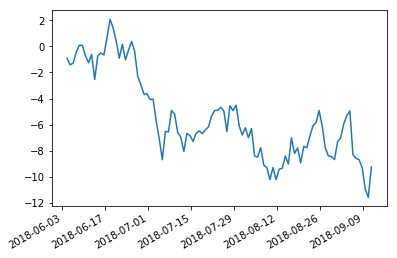

In [99]:
%matplotlib inline
ts = pd.Series(np.random.randn(100), index=pd.date_range('today', periods=100))
ts = ts.cumsum()
ts.plot()

#### 98. DataFrame 折线图

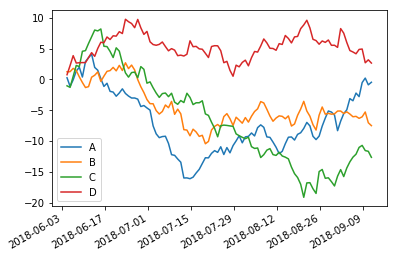

In [100]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot()

#### 99. DataFrame 散点图

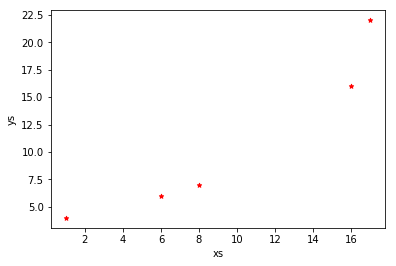

In [101]:
df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})
df = df.cumsum()
df.plot.scatter("xs","ys",color='red',marker="*")

#### 100. DataFrame 柱形图

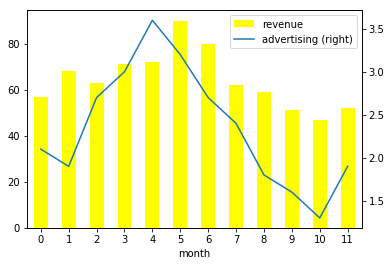

In [102]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })

ax = df.plot.bar("month", "revenue", color = "yellow")
df.plot("month", "advertising", secondary_y = True, ax = ax)

## <a id = "3">3. 实验总结</a>

如果你亲自动手做完了上面的 100 道练习题，相信你已经对 Pandas 模块的熟练程度又提升了不少。我们推荐你定期回顾这些题目，相信你一定会熟能生巧。本次实验涉及的知识点主要有：
- 创建Series
- Series基本操作
- 创建DataFrame
- DataFrame基本操作
- DataFrame文件操作
- Series，DataFrame和多索引
- 透视表
- 数据清洗
- 数据预处理
- 可视化